In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from nltk.tokenize import word_tokenize
import sklearn.metrics
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

nltk.download('punkt')

x_train_df = pd.read_csv('data_reviews/x_train.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')
x_test_df = pd.read_csv('data_reviews/x_test.csv')

tr_text_list = x_train_df['text'].values.tolist()
y_train = y_train_df['is_positive_sentiment'].values.tolist()
print(len(tr_text_list))

2400


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
x_train_text, x_test, y_target, y_test = train_test_split(tr_text_list, np.array(y_train), test_size=0.2, random_state=1337)

ps = nltk.stem.PorterStemmer()
#for i in range(len(tr_text_list)):
#    words = word_tokenize(tr_text_list[i])
#    for w in words:
#        tr_text_list[i] = ps.stem(tr_text_list[i])
def stem_sentence(sen):
    token_words = word_tokenize(sen)
    stemmed_sentence = []
    for word in token_words:
        stemmed_sentence.append(ps.stem(word))
        stemmed_sentence.append(" ")
    return "".join(stemmed_sentence)


for i in range(len(x_train_text)):
    x_train_text[i] = stem_sentence(x_train_text[i])

print(x_train_text)

punc = '.,!()-[]{};:''"\<>?@#$%\'^&*~1234567890'


cool_list = list()
for i in range(len(x_train_test)):
    word = x_train_test[i]
    for elem in word:
        if elem in punc:
            word = word.replace(elem, "")
    x_train_text[i] = word.lower()
    
for i in range(len(x_test)):
    word = x_test[i]
    for elem in word:
        if elem in punc:
            word = word.replace(elem, "")
    x_test[i] = word.lower()
    

["I 'm terribl disappoint that thi film would receiv so mani award and accolad , especi when there are far more deserv work of film out there . ", 'By the time the film end , I not onli dislik it , I despis it . ', 'I am not impress with thi and i would not recommend thi item to anyon . ', 'also the stori and act were weak . ', 'In a word , it is embarrass . ', "An interest premis , and billi drago is alway good as a danger nut-bag ( side note : I 'd love to see drago , stephen mchatti and lanc hendrikson in a flick togeth ; talk about rage cheekbon ! ) . ", 'the attract set use throughout most of the film is an eye-pleas gem . ', 'everyon is treat equal special . ', 'wont work right or atleast for me . ', 'then I exchang for the same phone , even that had the same problem . ', 'logitech bluetooth headset is a 10 ! . ', 'thi is one of the best bar with food in vega . ', 'I would have cast her in that role after readi the script . ', 'avoid thi one if you can . ', ') some great music , 

NameError: name 'x_train_test' is not defined

In [8]:
print(x_train_text)
print(len(x_test))

['i m terribl disappoint that thi film would receiv so mani award and accolad especi when there are far more deserv work of film out there ', 'by the time the film end i not onli dislik it i despi it ', 'i am not impress with thi and i would not recommend thi item to anyon ', 'also the stori and act were weak ', 'in a word it is embarrass ', 'an interest premi and billi drago is alway good as a danger nutbag side note i d love to see drago stephen mchatti and lanc hendrikson in a flick togeth talk about rage cheekbon ', 'the attract set use throughout most of the film is an eyeplea gem ', 'everyon is treat equal special ', 'wont work right or atleast for me ', 'then i exchang for the same phone even that had the same problem ', 'logitech bluetooth headset is a ', 'thi is one of the best bar with food in vega ', 'i would have cast her in that role after readi the script ', 'avoid thi one if you can ', 'some great music and terrif sceneri ', 'whi are these sad littl veget so overcook ', 

In [3]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)
bag = vectorizer.fit_transform(x_train_text)
analyze = vectorizer.build_analyzer()
print(vectorizer.get_feature_names())
transformed_x_train = vectorizer.transform(x_train_text).toarray()

test_bag = vectorizer.fit_transform(x_test)
transformed_x_test = vectorizer.transform(x_test).toarray()


['10', '10 10', '10 minut', '11', '12', '13', '15', '17', '20', '25', '25 year', '30', '30 minut', '35', '40', '40 minut', '50', '510', '80', '90', 'abil', 'abl', 'abov', 'absolut', 'absolut love', 'access', 'accur', 'act', 'act wa', 'action', 'action movi', 'action scene', 'actor', 'actress', 'actual', 'actual turn', 'ad', 'addit', 'ador', 'advertis', 'advis', 'africa', 'afternoon', 'ag', 'age', 'ago', 'air', 'allow', 'alreadi', 'alway', 'amaz', 'amazon', 'ambianc', 'ambienc', 'ampl', 'angl', 'ani', 'ani kind', 'ani problem', 'ani real', 'anim', 'annoy', 'anoth', 'anyon', 'anyon like', 'anyth', 'anytim', 'anytim soon', 'apart', 'apolog', 'appal', 'appeal', 'appear', 'appet', 'appreci', 'area', 'arriv', 'art', 'art movi', 'artist', 'ask', 'asleep', 'aspect', 'ass', 'assur', 'ate', 'atmospher', 'atmospher fun', 'atroci', 'att', 'attack', 'attempt', 'attent', 'attent provid', 'audienc', 'audio', 'audio qualiti', 'authent', 'auto', 'averag', 'avoid', 'avoid cost', 'avoid thi', 'aw', 'awar

In [4]:
def cross_validating_test(model, x_data, y_data, k):  # returns a list of scores and roc list
    print("starting cross validation...\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=1337)
    score_list = list()
    roc_list = list()
    err_list = list()
    acc_sum = 0
    roc_sum = 0
    counter = 0
    for train_index, test_index in kf.split(x_data):
        print("Iteration: ", counter)
        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        print("fitting...")
        model = model.fit(x_train, y_train)
        pred = model.predict_proba(x_test)[:,1]
        print("calculating score...")
        auc_score = sklearn.metrics.roc_auc_score(y_test, pred)
        err = log_loss(y_test, pred)
        model_score = model.score(x_test, y_test)
        score_list.append(model_score)
        roc_list.append(auc_score)
        err_list.append(err)
        acc_sum = acc_sum + model_score
        roc_sum = auc_score + roc_sum
        print("Accuracy: ", model_score)
        print("ROC AUC: ", auc_score)
        print()
        counter = counter + 1
        #print(pred)
    
    avg_acc = acc_sum / k
    avg_roc = roc_sum / k
    print("average accuracy: ", avg_acc)
    print("average AUROC: ", avg_roc)
    print("done!")
    
    return score_list, roc_list, err_list


In [35]:
C_grid = np.logspace(-9, 6, 31)

score_lists = list()
roc_lists = list()
err_lists = list()

va_score_lists = list()
va_roc_lists = list()
va_err_lists = list()

for C_val in C_grid:
    score, roc, err = cross_validating_test(LogisticRegression(C=C_val, penalty='l2', solver='liblinear'), transformed_x_train, y_target, 12)
    va_score, va_roc, va_err = cross_validating_test(LogisticRegression(C=C_val, penalty='l2', solver='liblinear'), transformed_x_test, y_test, 12)
    score_lists.append(score)
    roc_lists.append(roc)
    err_lists.append(err)
    
    va_score_lists.append(va_score)
    va_roc_lists.append(va_roc)
    va_err_lists.append(va_err)
    
    

starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7125
ROC AUC:  0.7647243107769424

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.828235294117647

Iteration:  2
fitting...
calculating score...
Accuracy:  0.63125
ROC AUC:  0.8146579283887468

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7837162056571338

Iteration:  4
fitting...
calculating score...
Accuracy:  0.59375
ROC AUC:  0.7671232876712328

Iteration:  5
fitting...
calculating score...
Accuracy:  0.6625
ROC AUC:  0.7614347616754935

Iteration:  6
fitting...
calculating score...
Accuracy:  0.68125
ROC AUC:  0.776235294117647

Iteration:  7
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.832083137990311

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.7752199874292898

Iteration:  9
fitting...
calculating score...
Accuracy:  0.66875
ROC AUC:  0.718730358265242

Iteration:  10
fitting...
calculat

fitting...
calculating score...
Accuracy:  0.64375
ROC AUC:  0.7606306736741519

Iteration:  11
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8621150219987429

average accuracy:  0.6833333333333335
average AUROC:  0.7870755218135485
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7525252525252526

Iteration:  1
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.7135416666666666

Iteration:  2
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.8069053708439898

Iteration:  3
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.8177083333333334

Iteration:  4
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.8596491228070176

Iteration:  5
fitting...
calculating score...
Accuracy:  0.5
ROC AUC:  0.9266666666666666

Iteration:  6
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.8320707070707071

Iteration:  7
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:

calculating score...
Accuracy:  0.625
ROC AUC:  0.8155370843989769

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7840287544928894

Iteration:  4
fitting...
calculating score...
Accuracy:  0.59375
ROC AUC:  0.7664934655959692

Iteration:  5
fitting...
calculating score...
Accuracy:  0.6625
ROC AUC:  0.7631198844487241

Iteration:  6
fitting...
calculating score...
Accuracy:  0.68125
ROC AUC:  0.7770980392156863

Iteration:  7
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8327863728707611

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.775691389063482

Iteration:  9
fitting...
calculating score...
Accuracy:  0.66875
ROC AUC:  0.7198302954116909

Iteration:  10
fitting...
calculating score...
Accuracy:  0.64375
ROC AUC:  0.761904761904762

Iteration:  11
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8625078566939032

average accuracy:  0.6828125000000002
average AUROC:  0.7877479640705797
done!
st

Accuracy:  0.525
ROC AUC:  0.7213541666666666

Iteration:  2
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.8132992327365729

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8216145833333334

Iteration:  4
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.8596491228070176

Iteration:  5
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.9253333333333333

Iteration:  6
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.8333333333333333

Iteration:  7
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.8070175438596491

Iteration:  8
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.848

Iteration:  9
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.7719298245614036

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.8686868686868687

Iteration:  11
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.7084398976982097

average accuracy:  0.625
average AUROC:  0

calculating score...
Accuracy:  0.75
ROC AUC:  0.8177840287544929

Iteration:  4
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.7913714375688867

Iteration:  5
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.7982667308618199

Iteration:  6
fitting...
calculating score...
Accuracy:  0.7125
ROC AUC:  0.7993725490196079

Iteration:  7
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8543522425378967

Iteration:  8
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.7916404776869893

Iteration:  9
fitting...
calculating score...
Accuracy:  0.68125
ROC AUC:  0.7558139534883721

Iteration:  10
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.7894569198917026

Iteration:  11
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.9054054054054054

average accuracy:  0.7359375000000002
average AUROC:  0.814486674073971
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.675
ROC A

Accuracy:  0.725
ROC AUC:  0.8640000000000001

Iteration:  9
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.81203007518797

Iteration:  10
fitting...
calculating score...
Accuracy:  0.875
ROC AUC:  0.9090909090909092

Iteration:  11
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7186700767263428

average accuracy:  0.7374999999999998
average AUROC:  0.8407772476464669
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8392857142857143

Iteration:  1
fitting...
calculating score...
Accuracy:  0.8125
ROC AUC:  0.8912156862745099

Iteration:  2
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.9127237851662404

Iteration:  3
fitting...
calculating score...
Accuracy:  0.83125
ROC AUC:  0.9081106422878575

Iteration:  4
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.841757203589986

Iteration:  5
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8865350666024716

Iter

calculating score...
Accuracy:  0.79375
ROC AUC:  0.8554004172684962

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8497254901960785

Iteration:  7
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8856071261134553

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8164676304211188

Iteration:  9
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8628221244500314

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.809842331581462

Iteration:  11
fitting...
calculating score...
Accuracy:  0.8625
ROC AUC:  0.9322752985543683

average accuracy:  0.7822916666666667
average AUROC:  0.8557505884603658
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.803030303030303

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7578125

Iteration:  2
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.823529

calculating score...
Accuracy:  0.75
ROC AUC:  0.7777777777777778

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.6112531969309463

average accuracy:  0.6979166666666666
average AUROC:  0.7670408755601003
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.69375
ROC AUC:  0.7850877192982457

Iteration:  1
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8223529411764705

Iteration:  2
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8184143222506394

Iteration:  3
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8629473355211752

Iteration:  4
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.7987718469532357

Iteration:  5
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8228213769860375

Iteration:  6
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8150588235294118

Iteration:  7
fitting...
calculating score...
Accuracy:  0.775
ROC 

fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7582495285983658

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8301382778126964

Iteration:  10
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7865902213728301

Iteration:  11
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8861565053425517

average accuracy:  0.7369791666666665
average AUROC:  0.7991599433145513
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7146464646464648

Iteration:  1
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.671875

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.8056265984654731

Iteration:  3
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8033854166666666

Iteration:  4
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.7067669172932332

Iteration:  5
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.896

I

In [5]:
def avg(lst):
    return sum(lst) / len(lst)

In [36]:
avg_scores = list()
avg_roc = list()
avg_err = list()

va_avg_scores = list()
va_avg_roc = list()
va_avg_err = list()

for i in range(len(score_lists)):
    avg_scores.append(avg(score_lists[i]))
    avg_roc.append(avg(roc_lists[i]))
    avg_err.append(avg(err_lists[i]))
    va_avg_scores.append(avg(va_score_lists[i]))
    va_avg_roc.append(avg(va_roc_lists[i]))
    va_avg_err.append(avg(va_err_lists[i]))
    
print(avg_scores)
print(avg_roc)
print(avg_err)

[0.6838541666666668, 0.6828124999999999, 0.6833333333333332, 0.6833333333333335, 0.6833333333333335, 0.6838541666666668, 0.6833333333333335, 0.6828125000000002, 0.6828125000000002, 0.6828125000000002, 0.6854166666666667, 0.6942708333333334, 0.7046875, 0.7223958333333332, 0.7359375000000002, 0.7598958333333333, 0.7817708333333333, 0.7958333333333333, 0.7989583333333332, 0.7973958333333333, 0.7895833333333333, 0.7822916666666667, 0.7723958333333334, 0.7598958333333335, 0.75625, 0.7552083333333334, 0.7494791666666667, 0.7416666666666667, 0.7369791666666665, 0.7281249999999999, 0.7208333333333335]
[0.7870755218135485, 0.7870755218135485, 0.7870755218135485, 0.7870755218135485, 0.7870755218135485, 0.7870755218135485, 0.7871224999183465, 0.7877479640705797, 0.7877414168256603, 0.7877414168256603, 0.7878203500351101, 0.788347651890414, 0.7905843247332953, 0.7980222804820447, 0.814486674073971, 0.8394654198991255, 0.8626270760933913, 0.8773924913624335, 0.8814254451831104, 0.876234945539159, 0

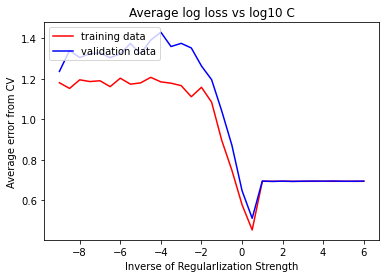

19
0
3.162277660168379e-07
3.1622776601683795


In [100]:
plt.plot(np.log10(C_grid), avg_err, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_err, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average log loss vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average error from CV')
plt.show()
print(va_avg_err.index(np.min(va_avg_err)))
print(va_avg_scores.index(np.max(va_avg_scores)))
print(C_grid[5])
print(C_grid[19])

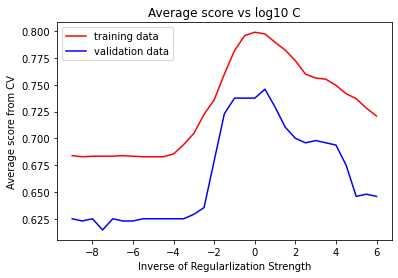

In [40]:
plt.plot(np.log10(C_grid), avg_scores, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_scores, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average score vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average score from CV')
plt.show()

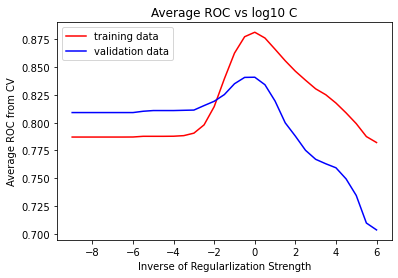

In [41]:
plt.plot(np.log10(C_grid), avg_roc, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_roc, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average ROC vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average ROC from CV')
plt.show()

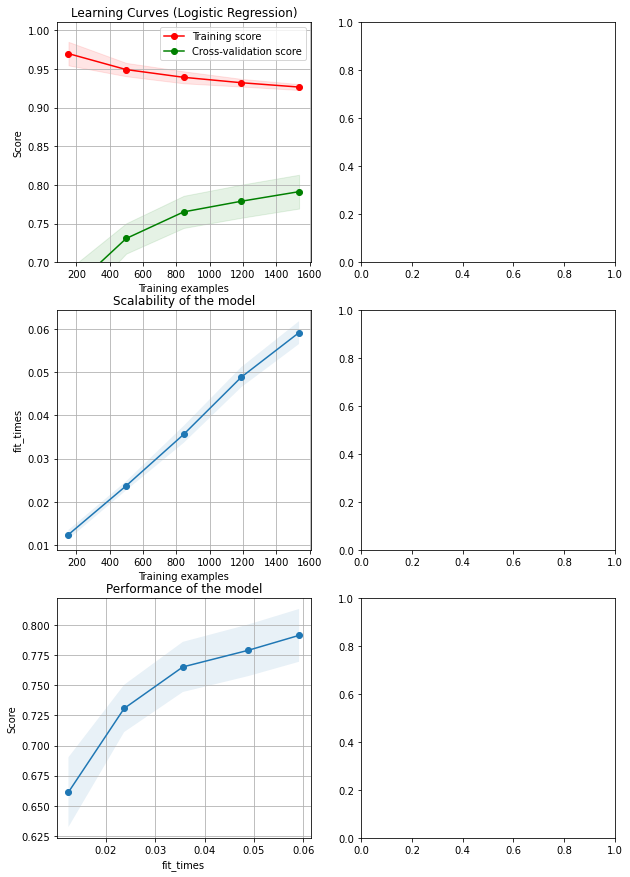

In [17]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
best_C = 0.31622776601683794
best_logistic_model = LogisticRegression(C=best_C, penalty='l2', solver='liblinear')

estimator = best_logistic_model
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

#title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

plt.show()


In [9]:
#mlp
C_grid = np.logspace(-9, 6, 31)

score_lists = list()
roc_lists = list()
err_lists = list()

va_score_lists = list()
va_roc_lists = list()
va_err_lists = list()

for C_val in C_grid:
    score, roc, err = cross_validating_test(MLPClassifier(alpha=C_val, activation='logistic', learning_rate='adaptive', momentum=0.1, solver='adam', hidden_layer_sizes=(200, 250,)), transformed_x_train, y_target, 12)
    va_score, va_roc, va_err = cross_validating_test(MLPClassifier(alpha=C_val, activation='logistic', learning_rate='adaptive', momentum=0.1, solver='adam', hidden_layer_sizes=(200, 250,)), transformed_x_test, y_test, 12)
    score_lists.append(score)
    roc_lists.append(roc)
    err_lists.append(err)
    
    va_score_lists.append(va_score)
    va_roc_lists.append(va_roc)
    va_err_lists.append(va_err)
    

starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.71875
ROC AUC:  0.8081140350877193

Iteration:  1
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8536470588235294

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8369565217391305

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8635724331926864

Iteration:  4
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.834199338686821

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7875
ROC AUC:  0.8459316321617718

Iteration:  6
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8098823529411765

Iteration:  7
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8806063447413658

Iteration:  8
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8238529226901321

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8577938403519799

Iteration:  10
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8233795190316929

Iteration:  11
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8948774355751099

average accuracy:  0.7755208333333333
average AUROC:  0.8444011195852595
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.720959595959596

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7356770833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8184143222506395

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.828125

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8408521303258146

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8853333333333334

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8484848484848484

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7593984962406015

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8320000000000001

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7606516290726818

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7777777777777778

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.676470588235294

average accuracy:  0.7083333333333334
average AUROC:  0.7903454004178267
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8054511278195489

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8442352941176471

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8334398976982098

Iteration:  3
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8591967494921082

Iteration:  4
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8340418831680051

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8509067565398811

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8125490196078432

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8782622284731989

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7184343434343434

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7356770833333333

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8260869565217391

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8359375

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8333333333333334

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8853333333333334

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.851010101010101

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7568922305764412

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.8293333333333334

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7656641604010025

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7828282828282828

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.6790281329923273

average accuracy:  0.7020833333333334
average AUROC:  0.7916298992581309
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8084273182957393

Iteration:  1
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8476862745098038

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8257672634271099

Iteration:  3
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8624785122675418

Iteration:  4
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8343567942056369

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8505857807735517

Iteration:  6
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.816

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8834192842631661

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8230672

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.6
ROC AUC:  0.7159090909090908

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7408854166666666

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8209718670076727

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8229166666666667

Iteration:  4
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.843358395989975

Iteration:  5
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8853333333333334

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8484848484848484

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.6
ROC AUC:  0.7418546365914787

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8266666666666667

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7681704260651628

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7828282828282829

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.6662404092071611

average accuracy:  0.7062499999999999
average AUROC:  0.7886350033680837
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.71875
ROC AUC:  0.8093671679197995

Iteration:  1
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8451764705882352

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8377557544757033

Iteration:  3
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.862322237849664

Iteration:  4
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8360888049126123

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8525116353715294

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8149019607843138

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8827941865916549

Iteration:  8
fitting...
calculating score...
Accuracy:  0.76875
ROC A

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7108585858585859

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7408854166666666

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8235294117647058

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.828125

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8358395989974937

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8746666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8459595959595959

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7468671679197996

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.832

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7656641604010025

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7777777777777778

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.6662404092071611

average accuracy:  0.6979166666666666
average AUROC:  0.7873678159349548
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7125
ROC AUC:  0.8092105263157895

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8489411764705882

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8348785166240409

Iteration:  3
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8643538052820753

Iteration:  4
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8323098724610297

Iteration:  5
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8465735836944311

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8166274509803922

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8846694796061885

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7625
R

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7058080808080808

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.73828125

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8158567774936061

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.828125

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8408521303258145

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.8746666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8459595959595958

Iteration:  7
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.7418546365914787

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.832

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7781954887218046

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7777777777777778

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.6713554987212276

average accuracy:  0.7020833333333333
average AUROC:  0.7875610752555043
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8073308270676691

Iteration:  1
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8461176470588235

Iteration:  2
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8359974424552431

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8629473355211752

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8343567942056369

Iteration:  5
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8533140747873535

Iteration:  6
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8144313725490196

Iteration:  7
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.882012814502266

Iteration:  8
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8229101194217473

Iteration:  9
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.8560653676932747

Iteration:  10
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8225832138875617

Iteration:  11
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8972344437460716

average accuracy:  0.7760416666666666
average AUROC:  0.8446084544079869
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7184343434343433

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7356770833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8209718670076727

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8229166666666667

Iteration:  4
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8383458646616542

Iteration:  5
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8773333333333333

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8409090909090908

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7518796992481203

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.8213333333333334

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.768170426065163

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7803030303030303

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.6739130434782608

average accuracy:  0.7062500000000002
average AUROC:  0.7875156484811668
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8082706766917294

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8456470588235294

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8275255754475703

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8638849820284419

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.76875
ROC AUC:  0.834199338686821

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8501043171240571

Iteration:  6
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8208627450980391

Iteration:  7
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8815439912486326

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7625
ROC AUC:  0.8229101194217474

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8587366436203645

Iteration:  10
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8275203057811754

Iteration:  11
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8942489000628535

average accuracy:  0.7723958333333333
average AUROC:  0.8446212211695802
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7058080808080808

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.73828125

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8209718670076727

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8255208333333334

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8458646616541354

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.888

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.851010101010101

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7343358395989976

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.8293333333333334

Iteration:  9
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.7631578947368421

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7828282828282828

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.6636828644501278

average accuracy:  0.7041666666666666
average AUROC:  0.7873995840634088
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.71875
ROC AUC:  0.8099937343358397

Iteration:  1
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8497254901960785

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8335997442455242

Iteration:  3
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8602906704172527

Iteration:  4
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8337269721303733

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8544374899695072

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8202352941176471

Iteration:  7
fitting...
calculating score...
Accuracy:  0.8125
ROC AUC:  0.8815439912486326

Iteration:  8
fitting...
calculating score...
Accuracy:  0.76875
ROC 

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7083333333333333

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7330729166666666

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8158567774936061

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8229166666666666

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8408521303258145

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.8826666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8409090909090908

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7343358395989975

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8346666666666667

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7556390977443609

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7803030303030303

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.6739130434782609

average accuracy:  0.7062500000000002
average AUROC:  0.78528877165443
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7125
ROC AUC:  0.8084273182957394

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8431372549019608

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8339194373401534

Iteration:  3
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8632598843569308

Iteration:  4
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8343567942056369

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8523511474883646

Iteration:  6
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8172549019607843

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8823253633380215

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8221244500314268

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8588937774984287

Iteration:  10
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8278388278388278

Iteration:  11
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8969201759899433

average accuracy:  0.7802083333333333
average AUROC:  0.8450674444371851
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.6
ROC AUC:  0.7133838383838383

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7382812499999999

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8286445012787724

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8307291666666666

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8483709273182958

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8826666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8459595959595958

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7493734335839599

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.8293333333333334

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7606516290726817

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7777777777777777

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.6739130434782609

average accuracy:  0.6958333333333333
average AUROC:  0.7899237636266543
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7125
ROC AUC:  0.8090538847117794

Iteration:  1
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8465882352941176

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8348785166240409

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8637287076105642

Iteration:  4
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8343567942056369

Iteration:  5
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8468945594607606

Iteration:  6
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8128627450980394

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8824816377558994

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC: 

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7159090909090908

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7356770833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8286445012787724

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8255208333333333

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8458646616541353

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8853333333333334

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8459595959595959

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.744360902255639

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.8346666666666667

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7581453634085212

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7803030303030303

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.6687979539641943

average accuracy:  0.7020833333333334
average AUROC:  0.7890985846999706
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8073308270676691

Iteration:  1
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8392941176470589

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8299232736572889

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8629473355211752

Iteration:  4
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8321524169422138

Iteration:  5
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8452896806291125

Iteration:  6
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8142745098039215

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.81875
ROC AUC:  0.8735739959368651

Iteration:  8
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8213387806411062

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8588937774984287

Iteration:  10
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.8187609491957318

Iteration:  11
fitting...
calculating score...
Accuracy:  0.8375
ROC AUC:  0.8959773727215588

average accuracy:  0.7770833333333332
average AUROC:  0.8416464197718442
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.726010101010101

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7486979166666666

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8209718670076727

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8255208333333333

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8383458646616542

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.88

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8383838383838383

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7418546365914787

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.8266666666666667

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7581453634085212

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.7828282828282828

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.6713554987212277

average accuracy:  0.7083333333333334
average AUROC:  0.7882317391066201
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.8020050125313283

Iteration:  1
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8369411764705882

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8288043478260868

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8702922331614314

Iteration:  4
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8241221854826012

Iteration:  5
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8390306531856845

Iteration:  6
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8067450980392158

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.81875
ROC AUC:  0.8688857634005314

Iteration:  8
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.8185103708359522

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8615650534255186

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8241758241758241

Iteration:  11
fitting...
calculating score...
Accuracy:  0.85
ROC AUC:  0.8967630421118792

average accuracy:  0.7713541666666667
average AUROC:  0.8398200633872203
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.726010101010101

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7356770833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8184143222506394

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8229166666666666

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8408521303258146

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.8773333333333334

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8484848484848484

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.736842105263158

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.8346666666666667

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7656641604010026

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7853535353535354

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.6713554987212276

average accuracy:  0.7083333333333334
average AUROC:  0.7886308709841939
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7985588972431078

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.74375
ROC AUC:  0.8234509803921568

Iteration:  2
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8256074168797953

Iteration:  3
fitting...
calculating score...
Accuracy:  0.8125
ROC AUC:  0.8716987029223318

Iteration:  4
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8227050858132577

Iteration:  5
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.835981383405553

Iteration:  6
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.815372549019608

Iteration:  7
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8727926238474761

Iteration:  8
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8141106222501571

Iteration:  9
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8596794468887492

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.73125
ROC AUC:  0.819557254339863

Iteration:  11
fitting...
calculating score...
Accuracy:  0.8375
ROC AUC:  0.8903205531112508

average accuracy:  0.7677083333333333
average AUROC:  0.8374862930094422
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7386363636363636

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.73828125

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8312020460358056

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8151041666666667

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8283208020050126

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8773333333333333

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8484848484848485

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7393483709273183

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8240000000000001

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.7581453634085213

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7803030303030303

Iteration:  11
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.656010230179028

average accuracy:  0.7104166666666667
average AUROC:  0.786264150414994
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.70625
ROC AUC:  0.7965225563909774

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8389803921568627

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.78125
ROC AUC:  0.8172953964194374

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.79375
ROC AUC:  0.8712298796686981

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75625
ROC AUC:  0.822075263737994

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8305247953779489

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.795921568627451

Iteration:  7
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8709173308329426

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.71875
ROC AUC:  0.8181961030798239

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8614079195474544

Iteration:  10
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8259276954929128

Iteration:  11
fitting...
calculating score...
Accuracy:  0.85
ROC AUC:  0.8881206788183532

average accuracy:  0.7682291666666669
average AUROC:  0.8364266316792381
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7411616161616161

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7252604166666667

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8337595907928388

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8072916666666667

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8233082706766917

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8906666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8661616161616161

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7418546365914788

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.808

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.7731829573934837

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7853535353535354

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.6585677749360613

average accuracy:  0.7125
average AUROC:  0.78788072900561
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.70625
ROC AUC:  0.8045112781954887

Iteration:  1
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8424313725490196

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.76875
ROC AUC:  0.823849104859335

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8727926238474761

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8275862068965518

Iteration:  5
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8398330926015085

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7625
ROC AUC:  0.8072156862745098

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.81875
ROC AUC:  0.8710736052508203

Iteration:  8
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8218101822752986

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.79375
ROC AUC:  0.8753928346951603

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.74375
ROC AUC:  0.8289536550406116

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.83125
ROC AUC:  0.8923632935260841

average accuracy:  0.7744791666666667
average AUROC:  0.8423177446676554
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.65
ROC AUC:  0.7487373737373737

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7434895833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8491048593350383

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.7994791666666667

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.81328320802005

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.875
ROC AUC:  0.9066666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8585858585858586

Iteration:  7
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.7493734335839599

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8160000000000001

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.7832080200501252

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7878787878787878

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.6585677749360614

average accuracy:  0.71875
average AUROC:  0.7928645610661601
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7125
ROC AUC:  0.8150062656641603

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8556078431372548

Iteration:  2
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8379156010230179

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8807626191592435

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.74375
ROC AUC:  0.8288458510470792

Iteration:  5
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8512277323062108

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8233725490196079

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.83125
ROC AUC:  0.8838881075167995

Iteration:  8
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8241671904462602

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.76875
ROC AUC:  0.88073538654934

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75625
ROC AUC:  0.8416945373467113

Iteration:  11
fitting...
calculating score...
Accuracy:  0.85
ROC AUC:  0.9110622250157133

average accuracy:  0.7749999999999999
average AUROC:  0.8528571590192833
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7411616161616161

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.76171875

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.8618925831202047

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8046875

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.818295739348371

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.9
ROC AUC:  0.9146666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8686868686868686

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7393483709273183

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8186666666666668

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.7957393483709274

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8055555555555556

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.6662404092071611

average accuracy:  0.7354166666666667
average AUROC:  0.7997216728926131
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.73125
ROC AUC:  0.825344611528822

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8710588235294118

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.79375
ROC AUC:  0.8574168797953964

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.85
ROC AUC:  0.8967026097827784

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.76875
ROC AUC:  0.8305778617540545

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.81875
ROC AUC:  0.8647087144920558

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7875
ROC AUC:  0.8450196078431372

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8375
ROC AUC:  0.8945147679324894

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.74375
ROC AUC:  0.8315524827152735

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.78125
ROC AUC:  0.8799497171590196

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.846631629240325

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8625
ROC AUC:  0.9256756756756758

average accuracy:  0.7937500000000001
average AUROC:  0.8640961151207032
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.7335858585858586

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75
ROC AUC:  0.8138020833333334

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.825
ROC AUC:  0.8772378516624041

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.775
ROC AUC:  0.8020833333333334

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.725
ROC AUC:  0.8583959899749374

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.85
ROC AUC:  0.9146666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.9015151515151515

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.7669172932330828

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.675
ROC AUC:  0.84

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8
ROC AUC:  0.8458646616541353

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.7
ROC AUC:  0.8333333333333334

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.6867007672634271

average accuracy:  0.7354166666666666
average AUROC:  0.8228419158796386
done!
starting cross validation...

Iteration:  0
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.75625
ROC AUC:  0.837875939849624

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.8375
ROC AUC:  0.8991372549019608

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.80625
ROC AUC:  0.8831521739130435

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.84375
ROC AUC:  0.9085794655414908

Iteration:  4
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.78125
ROC AUC:  0.8408124704770902

Iteration:  5
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.81875
ROC AUC:  0.8876584817846253

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.78125
ROC AUC:  0.8525490196078431

Iteration:  7
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.83125
ROC AUC:  0.907641819034224

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.73125
ROC AUC:  0.8472658705216844

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.73125
ROC AUC:  0.8684789440603394

Iteration:  10
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.78125
ROC AUC:  0.8526835483357222

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.89375
ROC AUC:  0.9468887492143306

average accuracy:  0.7994791666666666
average AUROC:  0.8777269781034982
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.7335858585858586

Iteration:  1
fitting...
calculating score...
Accuracy:  0.4
ROC AUC:  0.7981770833333334

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.8312020460358055

Iteration:  3
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.7317708333333334

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8383458646616541

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.888

Iteration:  6
fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.8560606060606061

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8320802005012532

Iteration:  8
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.92

Iteration:  9
fitt

calculating score...
Accuracy:  0.375
ROC AUC:  0.24000000000000002

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.6854636591478697

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.5707070707070707

Iteration:  11
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.2877237851662404

average accuracy:  0.45208333333333334
average AUROC:  0.4473453256064781
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.7264254385964912

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.1903529411764706

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.8195332480818415

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.5146116580715736

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.7340576287198868

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC A

calculating score...
Accuracy:  0.41875
ROC AUC:  0.5

Iteration:  6
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.5

Iteration:  7
fitting...
calculating score...
Accuracy:  0.50625
ROC AUC:  0.48054383497421477

Iteration:  8
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.5

Iteration:  9
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.5

Iteration:  10
fitting...
calculating score...
Accuracy:  0.43125
ROC AUC:  0.5

Iteration:  11
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.4641734758013828

average accuracy:  0.4890625
average AUROC:  0.49592053539163733
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.3825757575757576

Iteration:  1
fitting...
calculating score...
Accuracy:  0.4
ROC AUC:  0.5924479166666667

Iteration:  2
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.47058823529411764

Iteration:  3
fitting...
calculating score...
Accuracy:  

calculating score...
Accuracy:  0.375
ROC AUC:  0.448

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.4799498746867168

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.3737373737373737

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.5179028132992327

average accuracy:  0.4854166666666668
average AUROC:  0.5061615419668752
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.5

Iteration:  1
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.5

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.5

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.5

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.5

Iteration:  5
fitting...
calculating score...
Accuracy:  0.58125
ROC AUC:  0.5

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.5



In [10]:
avg_scores = list()
avg_roc = list()
avg_err = list()

va_avg_scores = list()
va_avg_roc = list()
va_avg_err = list()

for i in range(len(score_lists)):
    avg_scores.append(avg(score_lists[i]))
    avg_roc.append(avg(roc_lists[i]))
    avg_err.append(avg(err_lists[i]))
    va_avg_scores.append(avg(va_score_lists[i]))
    va_avg_roc.append(avg(va_roc_lists[i]))
    va_avg_err.append(avg(va_err_lists[i]))
    

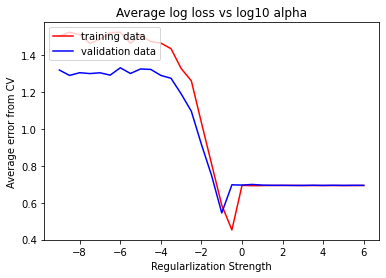

In [11]:
plt.plot(np.log10(C_grid), avg_err, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_err, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average log loss vs log10 alpha')
plt.xlabel('Regularlization Strength')
plt.ylabel('Average error from CV')
plt.show()

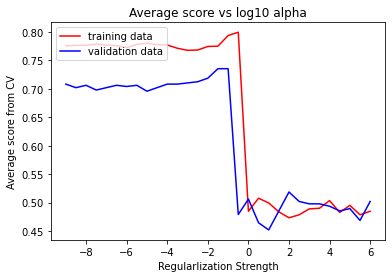

In [12]:
plt.plot(np.log10(C_grid), avg_scores, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_scores, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average score vs log10 alpha')
plt.xlabel('Regularlization Strength')
plt.ylabel('Average score from CV')
plt.show()

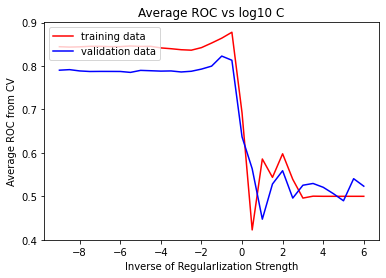

In [13]:
plt.plot(np.log10(C_grid), avg_roc, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_roc, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average ROC vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average ROC from CV')
plt.show()

<module 'matplotlib.pyplot' from 'D:\\jupyter\\lib\\site-packages\\matplotlib\\pyplot.py'>

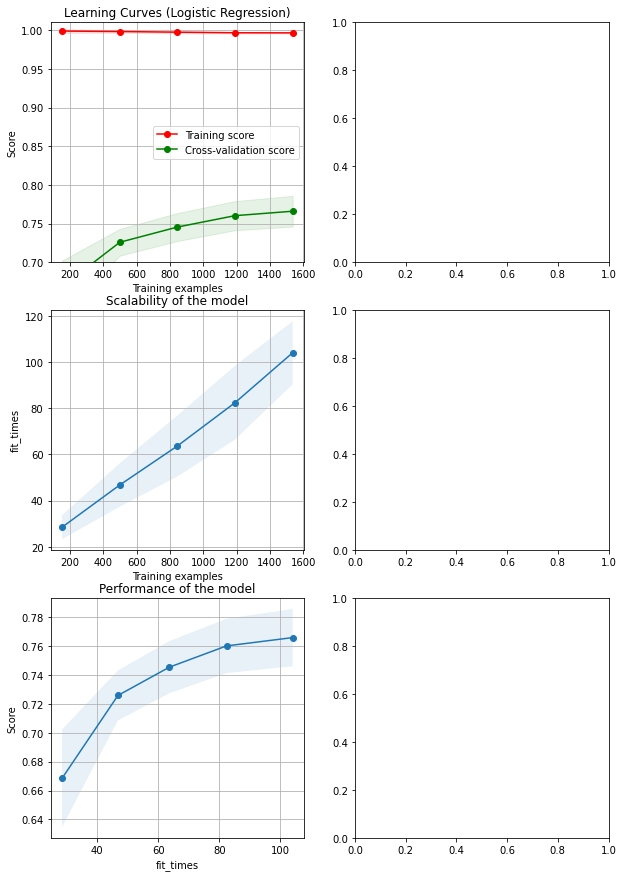

In [51]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
best_C = 0.31622776601683794
mlp = MLPClassifier(hidden_layer_sizes=(500,200,), alpha=0.1, activation='logistic', learning_rate='invscaling', momentum=0.1, nesterovs_momentum=False, solver='lbfgs')

estimator = mlp
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'D:\\jupyter\\lib\\site-packages\\matplotlib\\pyplot.py'>

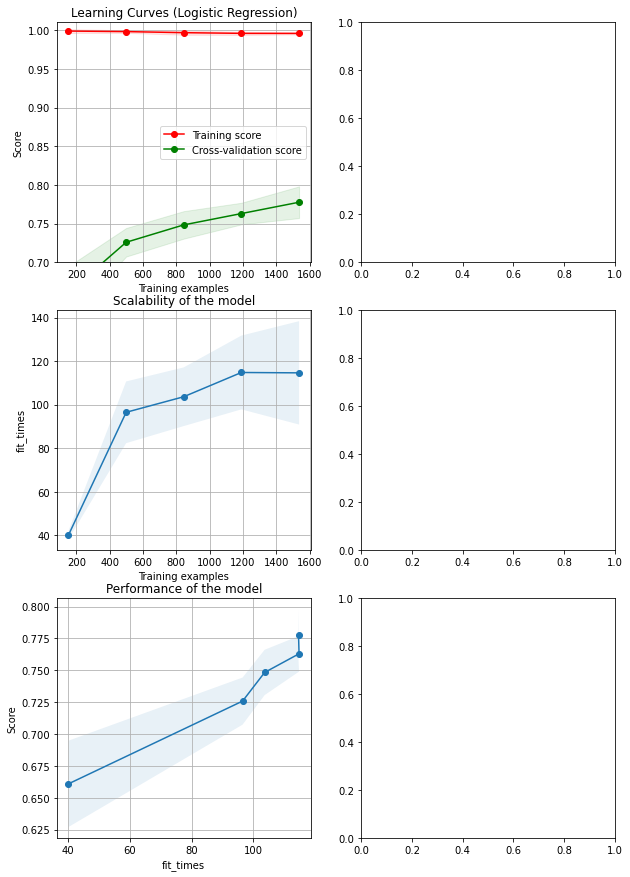

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
best_C = 0.31622776601683794
mlp = MLPClassifier(hidden_layer_sizes=(800,200,), alpha=0.1, activation='relu', learning_rate='constant', momentum=0.1, nesterovs_momentum=True, solver='adam')

estimator = mlp
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'D:\\jupyter\\lib\\site-packages\\matplotlib\\pyplot.py'>

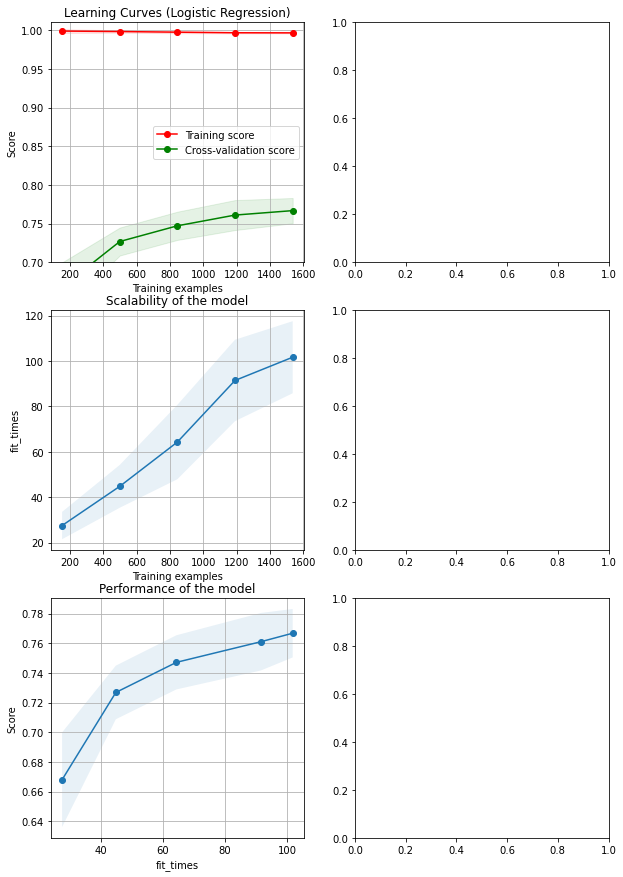

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
best_C = 0.31622776601683794
mlp = MLPClassifier(hidden_layer_sizes=(500, 300,), alpha=0.1, activation='logistic', learning_rate='constant', solver='lbfgs')

estimator = mlp
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [14]:
score_lists = list()
roc_lists = list()
err_lists = list()

va_score_lists = list()
va_roc_lists = list()
va_err_lists = list()

C_grid = np.logspace(-9, 6, 31)
for g in C_grid:
    mlp = MLPClassifier(hidden_layer_sizes=(800,200,), activation='relu', learning_rate='constant', 
                        momentum=0.1, nesterovs_momentum=True, solver='adam', alpha=g)
    score, roc, err = cross_validating_test(mlp, transformed_x_train, y_target, 12)
    va_score, va_roc, va_err = cross_validating_test(mlp, transformed_x_test, y_test, 12)
    score_lists.append(score)
    roc_lists.append(roc)
    err_lists.append(err)
    
    va_score_lists.append(va_score)
    va_roc_lists.append(va_roc)
    va_err_lists.append(va_err)



starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8295739348370927

Iteration:  1
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8665098039215685

Iteration:  2
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8654092071611252

Iteration:  3
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8896702609782778

Iteration:  4
fitting...
calculating score...
Accuracy:  0.7875
ROC AUC:  0.8475830577861754

Iteration:  5
fitting...
calculating score...
Accuracy:  0.84375
ROC AUC:  0.8886214090836142

Iteration:  6
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.84

Iteration:  7
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8951398656040006

Iteration:  8
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8485229415461973

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8675361407919548

Iteration:  10
fitting...
calculating score...
A

calculating score...
Accuracy:  0.775
ROC AUC:  0.8698931489629164

Iteration:  10
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8560280299410734

Iteration:  11
fitting...
calculating score...
Accuracy:  0.85625
ROC AUC:  0.9085480829666875

average accuracy:  0.7947916666666668
average AUROC:  0.8671304219338327
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.720959595959596

Iteration:  1
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7799479166666666

Iteration:  2
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8081841432225063

Iteration:  3
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.8333333333333333

Iteration:  4
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8884711779448622

Iteration:  5
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.888

Iteration:  6
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8888888888888888



calculating score...
Accuracy:  0.8
ROC AUC:  0.8661616161616162

Iteration:  7
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.7393483709273183

Iteration:  8
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8240000000000001

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7631578947368421

Iteration:  10
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8005050505050505

Iteration:  11
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.6841432225063939

average accuracy:  0.7291666666666665
average AUROC:  0.8018814131193731
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8312969924812029

Iteration:  1
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8709019607843137

Iteration:  2
fitting...
calculating score...
Accuracy:  0.80625
ROC AUC:  0.8684462915601023

Iteration:  3
fitting...
calculating score...
Accuracy:  0.83125
ROC AUC:  0.892

calculating score...
Accuracy:  0.825
ROC AUC:  0.8877949679637444

Iteration:  4
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8529365454259172

Iteration:  5
fitting...
calculating score...
Accuracy:  0.8375
ROC AUC:  0.8892633606162735

Iteration:  6
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8389019607843137

Iteration:  7
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8943584935146116

Iteration:  8
fitting...
calculating score...
Accuracy:  0.775
ROC AUC:  0.8460087994971717

Iteration:  9
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.872093023255814

Iteration:  10
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8501353718745023

Iteration:  11
fitting...
calculating score...
Accuracy:  0.86875
ROC AUC:  0.9121621621621621

average accuracy:  0.7989583333333333
average AUROC:  0.8670259110408746
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0

calculating score...
Accuracy:  0.7
ROC AUC:  0.7335858585858586

Iteration:  1
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7669270833333334

Iteration:  2
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8363171355498722

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8255208333333333

Iteration:  4
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8734335839598998

Iteration:  5
fitting...
calculating score...
Accuracy:  0.85
ROC AUC:  0.896

Iteration:  6
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8712121212121212

Iteration:  7
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7644110275689223

Iteration:  8
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8160000000000001

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.7631578947368421

Iteration:  10
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8080808080808081

Iteration:  11
fitting...
ca

calculating score...
Accuracy:  0.725
ROC AUC:  0.8055555555555556

Iteration:  11
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.6585677749360613

average accuracy:  0.7208333333333333
average AUROC:  0.7904544882284011
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8255012531328321

Iteration:  1
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8644705882352941

Iteration:  2
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8462276214833758

Iteration:  3
fitting...
calculating score...
Accuracy:  0.83125
ROC AUC:  0.8943584935146116

Iteration:  4
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8171941426547

Iteration:  5
fitting...
calculating score...
Accuracy:  0.78125
ROC AUC:  0.8632643235435725

Iteration:  6
fitting...
calculating score...
Accuracy:  0.7625
ROC AUC:  0.8494117647058823

Iteration:  7
fitting...
calculating score...
Accuracy:  0.8125
ROC AUC

calculating score...
Accuracy:  0.49375
ROC AUC:  0.7718393498984215

Iteration:  8
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7547140163419233

Iteration:  9
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.6978315524827152

Iteration:  10
fitting...
calculating score...
Accuracy:  0.56875
ROC AUC:  0.734193342888995

Iteration:  11
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.8760213702074169

average accuracy:  0.4973958333333333
average AUROC:  0.7162213280443548
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.678030303030303

Iteration:  1
fitting...
calculating score...
Accuracy:  0.4
ROC AUC:  0.8424479166666666

Iteration:  2
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.8593350383631713

Iteration:  3
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.26302083333333337

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8

calculating score...
Accuracy:  0.375
ROC AUC:  0.41600000000000004

Iteration:  6
fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.4444444444444445

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.6090225563909775

Iteration:  8
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.352

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.5050125313283208

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.4242424242424242

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.5946291560102301

average accuracy:  0.48125
average AUROC:  0.48487536656184965
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.5

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.5

Iteration:  3
fitting...
calculating score...
Accur

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.575
ROC AUC:  0.5230179028132993

average accuracy:  0.5145833333333334
average AUROC:  0.47790642318631454
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.5

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.5

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.5

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.5

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC AUC:  0.5

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.5

Iteration:  7
fitting...
calculating score...
Accuracy:  0.50625
ROC AUC:  0.5

Iteration:  8
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.5

Iteration:  9
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.5

Iteration:  10
fitting...
ca

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.6
ROC AUC:  0.35677083333333337

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.30325814536340856

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.39466666666666667

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.45
ROC AUC:  0.5555555555555556

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5037593984962406

Iteration:  8
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.625
ROC AUC:  0.608

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.581453634085213

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.4671717171717172

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.6445012787723785

average accuracy:  0.5145833333333334
average AUROC:  0.48086269870931747
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.5

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.5

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.5

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.5

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC AUC:  0.5

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.5



D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.55
ROC AUC:  0.48611111111111116

Iteration:  1
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.4
ROC AUC:  0.46484375

Iteration:  2
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.575
ROC AUC:  0.5345268542199488

Iteration:  3
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.6
ROC AUC:  0.4973958333333333

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5714285714285714

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.372

Iteration:  6
fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.494949494949495

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.38095238095238093

Iteration:  8
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.43733333333333335

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.680451127819549

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.41414141414141414

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.5370843989769821

average accuracy:  0.5145833333333334
average AUROC:  0.4892681891888433
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5

Iteration:  1
f

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.575
ROC AUC:  0.2647058823529412

Iteration:  3
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.2552083333333333

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.44611528822055135

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.472

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.45
ROC AUC:  0.398989898989899

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5463659147869674

Iteration:  8
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.464

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.525
ROC AUC:  0.5538847117794486

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.505050505050505

Iteration:  11
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.575
ROC AUC:  0.44501278772378516

average accuracy:  0.4937500000000001
average AUROC:  0.44400118278746264
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.5

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.5

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.5

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.5

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC AUC:  0.5

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.5

Iteration:  7
fitting...
calculating score...
Accuracy:  0.50625
ROC AUC:  0.5

Iteration:  8
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.5

Iteration:  9
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.5

Iteration:  10
fitting...
c

D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.475
ROC AUC:  0.468671679197995

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.512

Iteration:  6
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.45
ROC AUC:  0.4671717171717171

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.5827067669172932

Iteration:  8
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.4640000000000001

Iteration:  9
fitting...


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


calculating score...
Accuracy:  0.525
ROC AUC:  0.5350877192982456

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.5378787878787878

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.4616368286445013

average accuracy:  0.5145833333333334
average AUROC:  0.5091150434642514
done!


D:\jupyter\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
def get_std_dev(lst):
    std_list = list()
    for i in range(len(lst)):
        std = np.std(np.array(lst[i]))
        std_list.append(std)
    return std_list

score_list_std = get_std_dev(score_lists)
roc_list_std = get_std_dev(roc_lists)
err_list_std = get_std_dev(err_lists)

va_score_list_std = get_std_dev(va_score_lists)
va_roc_list_std = get_std_dev(va_roc_lists)
va_err_list_std = get_std_dev(va_err_lists)

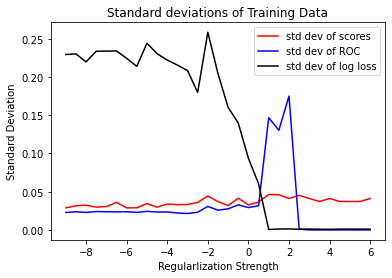

In [20]:
plt.plot(np.log10(C_grid), score_list_std, color='red', label='std dev of scores')
plt.plot(np.log10(C_grid), roc_list_std, color='blue', label='std dev of ROC')
plt.plot(np.log10(C_grid), err_list_std, color='black', label='std dev of log loss')
plt.legend(loc='upper right')
plt.title('Standard deviations of Training Data')
plt.xlabel('Regularlization Strength')
plt.ylabel('Standard Deviation')
plt.show()

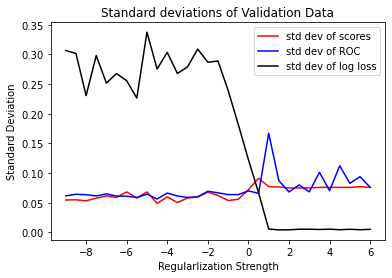

In [21]:
plt.plot(np.log10(C_grid), va_score_list_std, color='red', label='std dev of scores')
plt.plot(np.log10(C_grid), va_roc_list_std, color='blue', label='std dev of ROC')
plt.plot(np.log10(C_grid), va_err_list_std, color='black', label='std dev of log loss')
plt.legend(loc='upper right')
plt.title('Standard deviations of Validation Data')
plt.xlabel('Regularlization Strength')
plt.ylabel('Standard Deviation')
plt.show()

In [24]:
print(avg_err.index(np.min(avg_err)))
print(avg_scores.index(np.max(avg_scores)))
print(avg_roc.index(np.max(avg_roc)))
print(va_avg_err.index(np.min(va_avg_err)))
print(va_avg_scores.index(np.max(va_avg_scores)))
print(va_avg_roc.index(np.max(va_avg_roc)))
print(C_grid[17], C_grid[16], C_grid[15])

17
17
17
16
15
16
0.31622776601683794 0.1 0.03162277660168379


In [25]:
avg_scores = list()
avg_roc = list()
avg_err = list()

va_avg_scores = list()
va_avg_roc = list()
va_avg_err = list()

for i in range(len(score_lists)):
    avg_scores.append(avg(score_lists[i]))
    avg_roc.append(avg(roc_lists[i]))
    avg_err.append(avg(err_lists[i]))
    va_avg_scores.append(avg(va_score_lists[i]))
    va_avg_roc.append(avg(va_roc_lists[i]))
    va_avg_err.append(avg(va_err_lists[i]))
    

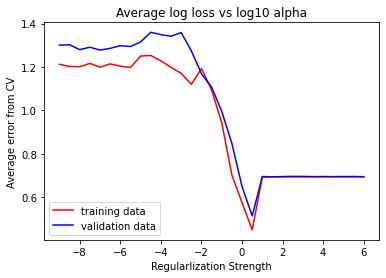

In [32]:
plt.plot(np.log10(C_grid), avg_err, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_err, color='blue', label='validation data')
plt.legend(loc='lower left')
plt.title('Average log loss vs log10 alpha')
plt.xlabel('Regularlization Strength')
plt.ylabel('Average error from CV')
plt.show()

In [107]:
print(avg_err.index(np.min(avg_err)))
print(avg_scores.index(np.max(avg_scores)))
print(avg_roc.index(np.max(avg_roc)))
#print(C_grid[19])
#print(C_grid[5])

6
2
2


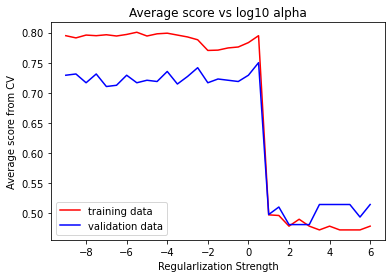

In [31]:
plt.plot(np.log10(C_grid), avg_scores, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_scores, color='blue', label='validation data')
plt.legend(loc='lower left')
plt.title('Average score vs log10 alpha')
plt.xlabel('Regularlization Strength')
plt.ylabel('Average score from CV')
plt.show()

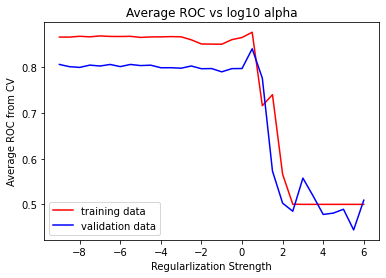

In [30]:
plt.plot(np.log10(C_grid), avg_roc, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_roc, color='blue', label='validation data')
plt.legend(loc='lower left')
plt.title('Average ROC vs log10 alpha')
plt.xlabel('Regularlization Strength')
plt.ylabel('Average ROC from CV')
plt.show()

<module 'matplotlib.pyplot' from 'D:\\jupyter\\lib\\site-packages\\matplotlib\\pyplot.py'>

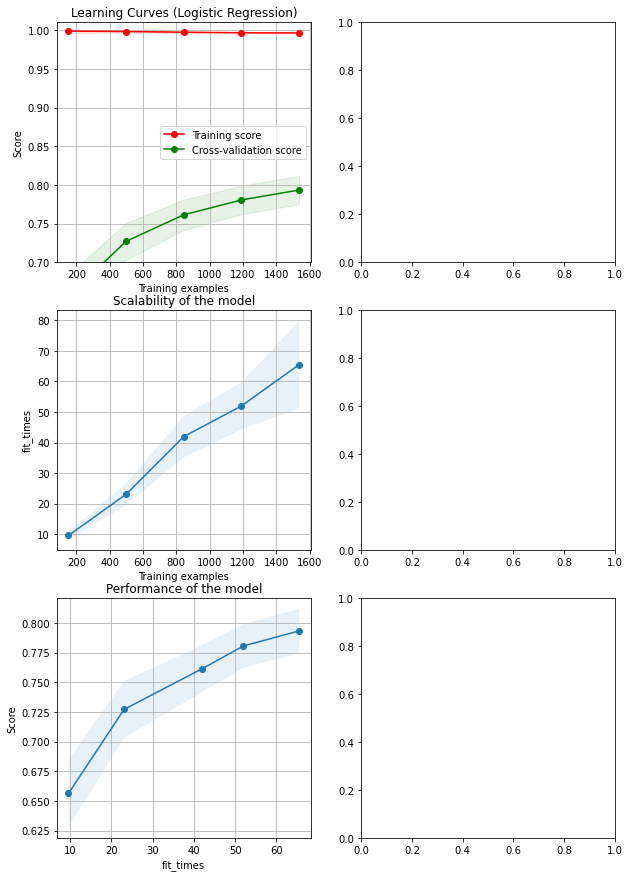

In [102]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(800,200,), activation='relu', learning_rate='constant', 
                        momentum=0.1, nesterovs_momentum=True, solver='adam', alpha=3.162277660168379e-07)

estimator = mlp
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [7]:
def cross_validating_test_svm(model, x_data, y_data, k):  # returns a list of scores and roc list
    print("starting cross validation...\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=1337)
    score_list = list()
    roc_list = list()
    err_list = list()
    acc_sum = 0
    roc_sum = 0
    counter = 0
    for train_index, test_index in kf.split(x_data):
        print("Iteration: ", counter)
        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        print("fitting...")
        model = model.fit(x_train, y_train)
        pred = model.predict(x_test)
        desc = model.decision_function(x_test)
        print("calculating score...")
        auc_score = sklearn.metrics.roc_auc_score(y_test, desc)
        model_score = model.score(x_test, y_test)
        err = log_loss(y_test, pred)
        score_list.append(model_score)
        roc_list.append(auc_score)
        err_list.append(err)
        acc_sum = acc_sum + model_score
        roc_sum = auc_score + roc_sum
        print("Accuracy: ", model_score)
        print("ROC AUC: ", auc_score)
        print()77
        counter = counter + 1
        #print(pred)
    
    avg_acc = acc_sum / k
    avg_roc = roc_sum / k
    print("average accuracy: ", avg_acc)
    print("average AUROC: ", avg_roc)
    print("done!")
    return score_list, roc_list, err_list

In [8]:
#svc

C_grid = np.logspace(-9, 6, 31)

score_lists = list()
roc_lists = list()
err_lists = list()

va_score_lists = list()
va_roc_lists = list()
va_err_lists = list()

svm_class = SVC(decision_function_shape='ovo', gamma='scale', kernel='linear', shrinking=True)

for C_val in C_grid:
    score, roc, err = cross_validating_test_svm(SVC(C=C_val, decision_function_shape='ovo', gamma='scale', kernel='linear', shrinking=True), transformed_x_train, y_target, 12)
    va_score, va_roc, va_err = cross_validating_test_svm(SVC(C=C_val, decision_function_shape='ovo', gamma='scale', kernel='linear', shrinking=True), transformed_x_test, y_test, 12)
    score_lists.append(score)
    roc_lists.append(roc)
    err_lists.append(err)
    
    va_score_lists.append(va_score)
    va_roc_lists.append(va_roc)
    va_err_lists.append(va_err)

starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.7879072681704261

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.8289411764705882

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.8529411764705882

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.8064541334583528

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.7797197291765077

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC AUC:  0.7778847696998876

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.748313725490196

Iteration:  7
fitting...
calculating score...
Accuracy:  0.50625
ROC AUC:  0.8277074542897328

Iteration:  8
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7889692017598995

Iteration:  9
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7152734129478315

Iteration:  10
fitting...
c

Accuracy:  0.5375
ROC AUC:  0.7889692017598995

Iteration:  9
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7152734129478315

Iteration:  10
fitting...
calculating score...
Accuracy:  0.43125
ROC AUC:  0.774247491638796

Iteration:  11
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.9087052168447518

average accuracy:  0.4786458333333334
average AUROC:  0.8000659385352682
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.7108585858585859

Iteration:  1
fitting...
calculating score...
Accuracy:  0.4
ROC AUC:  0.8177083333333334

Iteration:  2
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.8670076726342711

Iteration:  3
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.7356770833333334

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8471177944862155

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.8813333333333333

Iterat

fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.861111111111111

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8170426065162908

Iteration:  8
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.9293333333333333

Iteration:  9
fitting...
calculating score...
Accuracy:  0.525
ROC AUC:  0.8408521303258145

Iteration:  10
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.8118686868686869

Iteration:  11
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.6841432225063938

average accuracy:  0.5145833333333334
average AUROC:  0.8170044911367252
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.7879072681704261

Iteration:  1
fitting...
calculating score...
Accuracy:  0.46875
ROC AUC:  0.8288627450980391

Iteration:  2
fitting...
calculating score...
Accuracy:  0.425
ROC AUC:  0.8546994884910485

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
RO

calculating score...
Accuracy:  0.425
ROC AUC:  0.8516624040920715

Iteration:  3
fitting...
calculating score...
Accuracy:  0.49375
ROC AUC:  0.8092670729801531

Iteration:  4
fitting...
calculating score...
Accuracy:  0.45625
ROC AUC:  0.7804282790111793

Iteration:  5
fitting...
calculating score...
Accuracy:  0.41875
ROC AUC:  0.772107205905954

Iteration:  6
fitting...
calculating score...
Accuracy:  0.53125
ROC AUC:  0.7467450980392157

Iteration:  7
fitting...
calculating score...
Accuracy:  0.50625
ROC AUC:  0.8279418659165494

Iteration:  8
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7888120678818353

Iteration:  9
fitting...
calculating score...
Accuracy:  0.5375
ROC AUC:  0.7151948460087996

Iteration:  10
fitting...
calculating score...
Accuracy:  0.43125
ROC AUC:  0.7753623188405797

Iteration:  11
fitting...
calculating score...
Accuracy:  0.4625
ROC AUC:  0.9094908862350721

average accuracy:  0.4786458333333334
average AUROC:  0.7994688768567754
done!


Accuracy:  0.4625
ROC AUC:  0.909098051539912

average accuracy:  0.48333333333333334
average AUROC:  0.7992855096434394
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.7133838383838383

Iteration:  1
fitting...
calculating score...
Accuracy:  0.4
ROC AUC:  0.82421875

Iteration:  2
fitting...
calculating score...
Accuracy:  0.575
ROC AUC:  0.860613810741688

Iteration:  3
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.7317708333333334

Iteration:  4
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8433583959899749

Iteration:  5
fitting...
calculating score...
Accuracy:  0.375
ROC AUC:  0.8786666666666667

Iteration:  6
fitting...
calculating score...
Accuracy:  0.45
ROC AUC:  0.888888888888889

Iteration:  7
fitting...
calculating score...
Accuracy:  0.475
ROC AUC:  0.8045112781954887

Iteration:  8
fitting...
calculating score...
Accuracy:  0.625
ROC AUC:  0.9266666666666666

Iteration:  9
fitting.

Accuracy:  0.675
ROC AUC:  0.8746666666666667

Iteration:  9
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.8609022556390977

Iteration:  10
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8674242424242423

Iteration:  11
fitting...
calculating score...
Accuracy:  0.55
ROC AUC:  0.7058823529411764

average accuracy:  0.71875
average AUROC:  0.834590740835938
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.831610275689223

Iteration:  1
fitting...
calculating score...
Accuracy:  0.83125
ROC AUC:  0.9023529411764706

Iteration:  2
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8884271099744245

Iteration:  3
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8926394749179559

Iteration:  4
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8403401039206425

Iteration:  5
fitting...
calculating score...
Accuracy:  0.81875
ROC AUC:  0.8773872572620767

Iteration:  

calculating score...
Accuracy:  0.7625
ROC AUC:  0.8271545498314877

Iteration:  6
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.8098039215686275

Iteration:  7
fitting...
calculating score...
Accuracy:  0.79375
ROC AUC:  0.8526332239412407

Iteration:  8
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8202388434946575

Iteration:  9
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8658076681332495

Iteration:  10
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.822742474916388

Iteration:  11
fitting...
calculating score...
Accuracy:  0.8125
ROC AUC:  0.890477686989315

average accuracy:  0.7552083333333334
average AUROC:  0.8351451139643725
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.7575757575757576

Iteration:  1
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.6861979166666666

Iteration:  2
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:

Accuracy:  0.8
ROC AUC:  0.8989769820971867

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7760416666666666

Iteration:  4
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.7218045112781954

Iteration:  5
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8613333333333333

Iteration:  6
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8914141414141414

Iteration:  7
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7092731829573935

Iteration:  8
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7653333333333334

Iteration:  9
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7944862155388471

Iteration:  10
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.7146464646464646

Iteration:  11
fitting...
calculating score...
Accuracy:  0.6
ROC AUC:  0.6099744245524297

average accuracy:  0.7062500000000002
average AUROC:  0.7644406176986375
done!
starting cross validation...

Iteration:  0
f

calculating score...
Accuracy:  0.7
ROC AUC:  0.7548558897243108

Iteration:  1
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.779686274509804

Iteration:  2
fitting...
calculating score...
Accuracy:  0.71875
ROC AUC:  0.7794117647058822

Iteration:  3
fitting...
calculating score...
Accuracy:  0.76875
ROC AUC:  0.8077824660103141

Iteration:  4
fitting...
calculating score...
Accuracy:  0.70625
ROC AUC:  0.764289088332546

Iteration:  5
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.7921681913015568

Iteration:  6
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7414901960784315

Iteration:  7
fitting...
calculating score...
Accuracy:  0.75625
ROC AUC:  0.8023128613845913

Iteration:  8
fitting...
calculating score...
Accuracy:  0.71875
ROC AUC:  0.774041483343809

Iteration:  9
fitting...
calculating score...
Accuracy:  0.74375
ROC AUC:  0.8191389063482086

Iteration:  10
fitting...
calculating score...
Accuracy:  0.7375
ROC AUC:  0.8155757

calculating score...
Accuracy:  0.7375
ROC AUC:  0.8155757286192069

Iteration:  11
fitting...
calculating score...
Accuracy:  0.73125
ROC AUC:  0.8232243871778755

average accuracy:  0.7328125
average AUROC:  0.7878052432727185
done!
starting cross validation...

Iteration:  0
fitting...
calculating score...
Accuracy:  0.7
ROC AUC:  0.7373737373737375

Iteration:  1
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7005208333333333

Iteration:  2
fitting...
calculating score...
Accuracy:  0.8
ROC AUC:  0.8989769820971867

Iteration:  3
fitting...
calculating score...
Accuracy:  0.725
ROC AUC:  0.7760416666666666

Iteration:  4
fitting...
calculating score...
Accuracy:  0.675
ROC AUC:  0.7167919799498748

Iteration:  5
fitting...
calculating score...
Accuracy:  0.75
ROC AUC:  0.8613333333333333

Iteration:  6
fitting...
calculating score...
Accuracy:  0.825
ROC AUC:  0.8914141414141414

Iteration:  7
fitting...
calculating score...
Accuracy:  0.65
ROC AUC:  0.7092731829573935

In [83]:
avg_scores = list()
avg_roc = list()
avg_err = list()

va_avg_scores = list()
va_avg_roc = list()
va_avg_err = list()

for i in range(len(score_lists)):
    avg_scores.append(avg(score_lists[i]))
    avg_roc.append(avg(roc_lists[i]))
    avg_err.append(avg(err_lists[i]))
    va_avg_scores.append(avg(va_score_lists[i]))
    va_avg_roc.append(avg(va_roc_lists[i]))
    va_avg_err.append(avg(va_err_lists[i]))
    

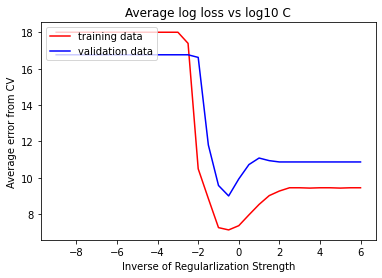

In [84]:
plt.plot(np.log10(C_grid), avg_err, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_err, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average log loss vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average error from CV')
plt.show()

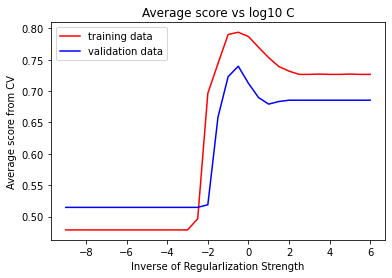

In [87]:
plt.plot(np.log10(C_grid), avg_scores, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_scores, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average score vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average score from CV')
plt.show()

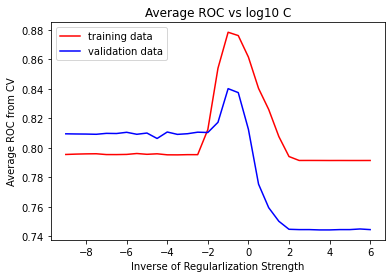

In [88]:
plt.plot(np.log10(C_grid), avg_roc, color='red', label='training data')
plt.plot(np.log10(C_grid), va_avg_roc, color='blue', label='validation data')
plt.legend(loc='upper left')
plt.title('Average ROC vs log10 C')
plt.xlabel('Inverse of Regularlization Strength')
plt.ylabel('Average ROC from CV')
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


X = transformed_x_train
y = y_target

title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=24, test_size=0.2, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(800,200,), activation='relu', learning_rate='constant', 
                        momentum=0.1, nesterovs_momentum=True, solver='adam', alpha=g)

estimator = mlp
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)